In [75]:
# se instalan las librerías
!pip install ucimlrepo

In [59]:
# se carga la data
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_failure_clinical_records = fetch_ucirepo(id=519)

# se eliminan los registros con valores nulos
heart_failure_clinical_records.data.features = heart_failure_clinical_records.data.features.dropna()
heart_failure_clinical_records.data.targets = heart_failure_clinical_records.data.targets.dropna()

# data (as pandas dataframes)
X = heart_failure_clinical_records.data.features
y = heart_failure_clinical_records.data.targets

print("X:")
print(X)
print("y:")
print(y)

X:
      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex

In [60]:
# prompt: Se obtienen las columnas con mayor correlación del dataframe X con el dataframe y

import pandas as pd

# Calculate the correlation matrix between X and y
correlation_matrix = pd.concat([X, y], axis=1).corr()

# Get the correlation of each feature with the target variable
target_correlations = correlation_matrix[y.columns[0]]

# Remove the correlation of the target variable with itself
target_correlations = target_correlations.drop(y.columns[0])

# Sort the features by their absolute correlation with the target variable
sorted_correlations = target_correlations.abs().sort_values(ascending=False)

# Print the top features with the highest correlation
print("Top features with the highest correlation with the target variable:")
print(sorted_correlations)

# You can select a certain number of top features with the highest correlation
# For example, to get the top features:
top_features = sorted_correlations.head(8).index.tolist()
print("\nTop features:")
print(top_features)

Top features with the highest correlation with the target variable:
time                        0.526964
serum_creatinine            0.294278
ejection_fraction           0.268603
age                         0.253729
serum_sodium                0.195204
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
platelets                   0.049139
smoking                     0.012623
sex                         0.004316
diabetes                    0.001943
Name: death_event, dtype: float64

Top features:
['time', 'serum_creatinine', 'ejection_fraction', 'age', 'serum_sodium', 'high_blood_pressure', 'anaemia', 'creatinine_phosphokinase']


In [61]:
X = X[top_features]

In [62]:
# se escalan las variables del dataframe X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.62950241e+00,  4.90056987e-01, -1.53055953e+00, ...,
         1.35927151e+00, -8.71104775e-01,  1.65728387e-04],
       [-1.60369074e+00, -2.84552352e-01, -7.07675018e-03, ...,
        -7.35688190e-01, -8.71104775e-01,  7.51463953e+00],
       [-1.59078490e+00, -9.09000174e-02, -1.53055953e+00, ...,
        -7.35688190e-01, -8.71104775e-01, -4.49938761e-01],
       ...,
       [ 1.90669738e+00, -5.75030855e-01,  1.85495776e+00, ...,
        -7.35688190e-01, -8.71104775e-01,  1.52597865e+00],
       [ 1.93250906e+00,  5.92615005e-03, -7.07675018e-03, ...,
        -7.35688190e-01, -8.71104775e-01,  1.89039811e+00],
       [ 1.99703825e+00,  1.99578485e-01,  5.85388775e-01, ...,
        -7.35688190e-01, -8.71104775e-01, -3.98321274e-01]])

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=123)

**********************************************************************
**Creación del Modelo con Perceptrón**
**********************************************************************

In [64]:
# se crea el grid con GridSearchCV para evaluar los parámetros de un modelo Perceptron
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.0001, 0.1, 1.0],
    'max_iter': [100, 500, 1000],
    'tol': [1e-3, 1e-4, 1e-5]
}
grid = GridSearchCV(
        estimator = Perceptron(random_state=0),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )
_ = grid.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Text(0.5, 1.0, 'Error de validacion cruzada')

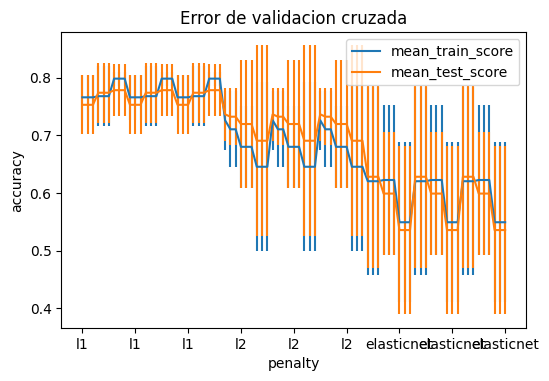

In [65]:
# se grafican los resultados:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_penalty', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_penalty', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_ylabel('accuracy')
ax.set_xlabel('penalty')
ax.set_title('Error de validacion cruzada')

In [66]:
# se imprime el mejor modelo
modelo = grid.best_estimator_
modelo

Perceptron(max_iter=100, penalty='elasticnet')

In [72]:
# se obtiene el score de modelo
print("Mejor score con Perceptrón")
modelo.score(x_test, y_test)

Mejor score con Perceptrón


0.7833333333333333

**********************************************************************
**Creación del Modelo con Adaline**
**********************************************************************

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

param_grid = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'alpha': [0.0001, 0.1, 1.0],
    'max_iter': [100, 500, 1000],
}
grid = GridSearchCV(
        estimator =  SGDClassifier(learning_rate='constant', eta0=0.01, random_state=123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )
_ = grid.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Text(0.5, 1.0, 'Error de validacion cruzada')

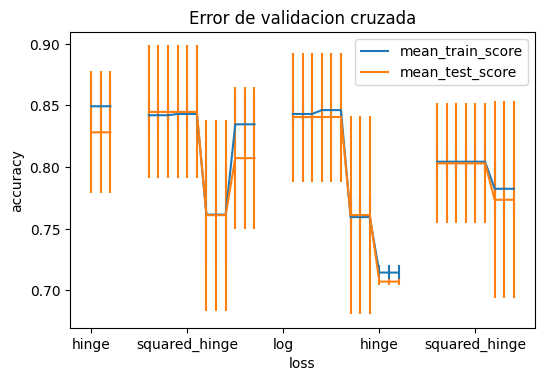

In [78]:
# se grafican los resultados:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_loss', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_loss', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_ylabel('accuracy')
ax.set_xlabel('loss')
ax.set_title('Error de validacion cruzada')

In [79]:
# se imprime el mejor modelo
modelo = grid.best_estimator_
modelo

SGDClassifier(eta0=0.01, learning_rate='constant', loss='modified_huber',
              max_iter=100, random_state=123)

In [81]:
# se obtiene el score de modelo
print("Mejor score con Adaline")
modelo.score(x_test, y_test)

Mejor score con Adaline


0.85

**********************************************************************
**Creación del Modelo con  Regresión logística**
**********************************************************************

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
}
grid = GridSearchCV(
        estimator =  LogisticRegression(random_state=0),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )
_ = grid.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Text(0.5, 1.0, 'Error de validacion cruzada')

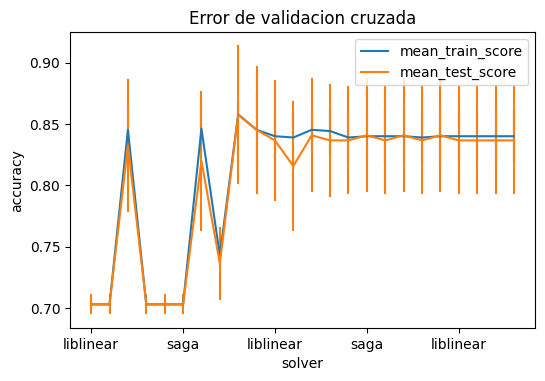

In [83]:
# se grafican los resultados:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_solver', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_solver', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_ylabel('accuracy')
ax.set_xlabel('solver')
ax.set_title('Error de validacion cruzada')

In [84]:
# se imprime el mejor modelo
modelo = grid.best_estimator_
modelo

LogisticRegression(C=0.1, penalty='l1', random_state=0, solver='liblinear')

In [85]:
# se obtiene el score de modelo
print("Mejor score con LogisticRegression")
modelo.score(x_test, y_test)

Mejor score con LogisticRegression


0.85

Conclusiones:
Los mejores resultados fueron:

*   Mejor score con Perceptrón: 0.78
*   Mejor score con Adaline: 0.85
*   Mejor score con LogisticRegression: 0.85

